# Linear Regression

## Importing data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('flats_prep.csv', sep=';')
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,3.912023,0,10.463103
1,1.0,0,0,3.610918,0,10.463103
2,3.0,1,0,4.204693,0,11.082143
3,2.0,1,0,3.044522,0,9.615805
4,1.0,1,0,4.406719,1,11.002100
...,...,...,...,...,...,...
208,2.0,0,1,4.174387,1,10.745206
209,3.0,0,1,4.430817,1,10.962631
210,3.0,0,1,4.532599,1,11.059000
211,2.0,0,1,4.276666,1,10.841951


## Correlations

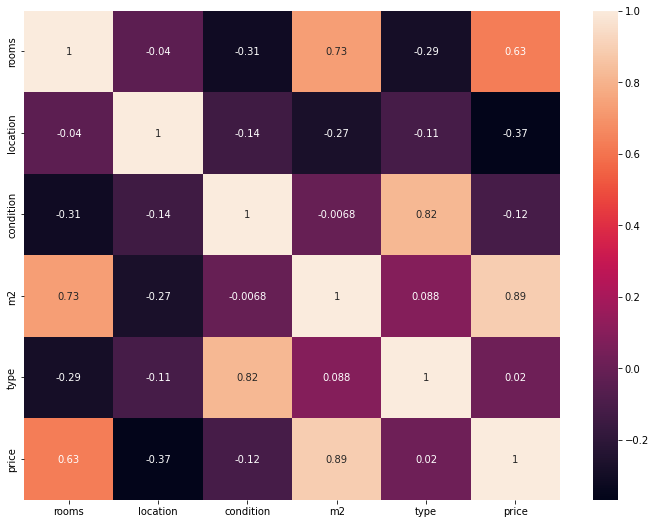

In [3]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Splitting

In [4]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Simple Linear Regression

In [5]:
# Fitting Simple Linear Regression to the Training set (M2)
f1 = ['m2']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([1.26900078]), 5.711239304266699)

In [6]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.801, 0.748)

In [7]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.27, 0.24)

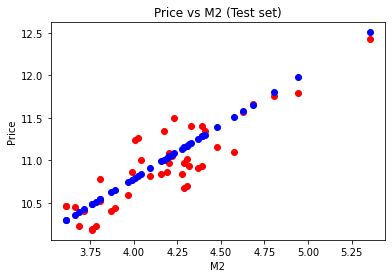

In [8]:
# Visualising the Test set results
plt.scatter(X_test['m2'], y_test, color = 'red')
plt.plot(X_test['m2'], sr.predict(X_test[f1]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

## Multiple Linear Regression

In [10]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.839

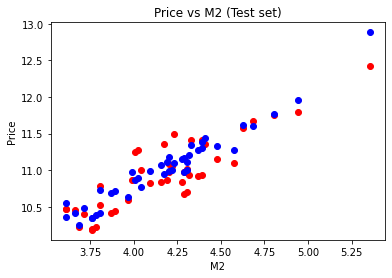

In [11]:
# Visualising the Test set results
plt.scatter(X_test['m2'], y_test, color = 'red')
plt.plot(X_test['m2'], mr.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [9]:
#!pip install statsmodels

In [12]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

C:\Users\kater\anaconda3\envs\labs\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     171.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           3.26e-63
Time:                        14:36:26   Log-Likelihood:                -1.8297
No. Observations:                 170   AIC:                             15.66
Df Residuals:                     164   BIC:                             34.47
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7866      0.287     20.139      0.000       5.219       6.354
rooms         -0.0831      0.040     -2.072      0.040      -0.162      -0.004
location      -0.1911      0.047     -4.023      0.000      -0.285      -0.097
condition     -0.3088      0.074     -4.162      0.000      -0.455      -0.162
m2             1.3408      0.086     15.527      0.000       1.170       1.511
type           0.1031      0.084      1.230      0.220      -0.062       0.269
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                2.957
Skew:                           0.055   Prob(JB):                        0.228
Kurtosis:                       2.363   Cond. No.                         78.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recursive feature elimination

In [13]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

In [14]:
# Fitting Optimized Multiple Regression
f_lm = ['location','condition','m2']
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-0.20820956, -0.18079867,  1.21010086]), 6.158326622235892)

In [15]:
# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.83

In [16]:
# Mean squared error
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.25, 0.21)

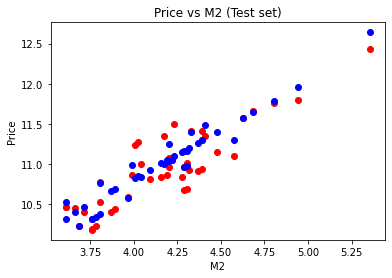

In [17]:
# Visualising the Test set results
plt.scatter(X_test['m2'], y_test, color = 'red')
plt.plot(X_test['m2'], mr_rfe.predict(X_test[f_lm]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

### Backward Elimination

In [18]:
# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.0001
X_Modeled = backwardElimination(X_train, y_train, SL)

C:\Users\kater\anaconda3\envs\labs\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.801

## Polynomial Regression

In [20]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[f_lm])
X_test_p = PolynomialFeatures().fit_transform(X_test[f_lm])

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 0.        ,  1.27432654,  0.03819144, -0.56686441, -2.94509921,
         2.06856093,  0.13573608, -0.014435  , -0.32016868, -0.55002321,
         0.78859056,  0.03819144,  0.11408691, -0.01072433, -0.33674898,
        -0.56686441,  0.43947509, -0.45757733,  0.73013667, -1.33538512,
         2.06856093]),
 12.294105069102786)

In [21]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.872

In [22]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.22, 0.58)

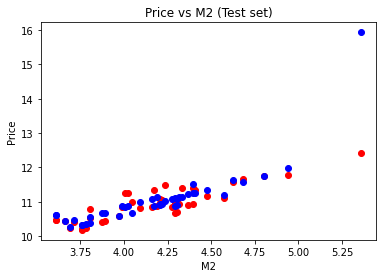

In [23]:
# Visualising the Test set results
plt.scatter(X_test['m2'], y_test, color = 'red')
plt.plot(X_test['m2'], pr.predict(X_test_p), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

## Pickle

In [24]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()